In [3]:
!pip install scikeras

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers, metrics
from scikeras.wrappers import KerasClassifier


%matplotlib inline

In [5]:
# loading data
path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

# Analizing the dataset

Figuring out the dataset's features and shape

In [6]:
print(f"rows x cols: {df.shape}")


rows x cols: (7043, 21)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We've got 21 features: 3 numerical, 10 categorical, 8 binary.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Features "TotalCharges" and Dhas wrong type. It shoud be converted to float64.


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [11]:
df[df['TotalCharges'] == ' '].shape[0]

11

We've got 11 strings = " ", that's why we cant convert feature to float64. We'll change ' ' for nan, and then change feature's type.

In [12]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = np.nan

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

<Axes: ylabel='Density'>

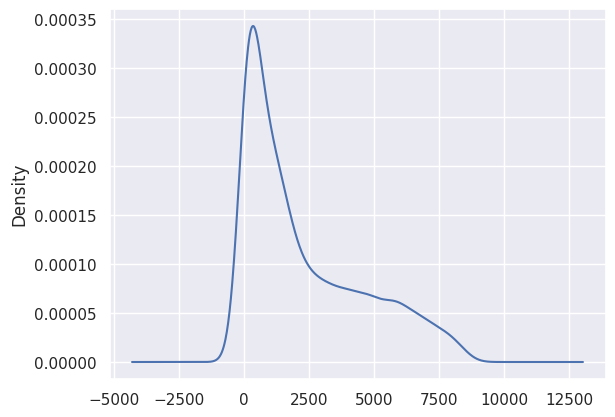

In [14]:
df['TotalCharges'].plot.kde()

As out feature is skewed, asymmetric we can't use mean value to fill NaNs because it can give us missleading representation of data that's why we use meidan here

In [15]:
median = float(df['TotalCharges'].median())
df['TotalCharges'].fillna(float(median), inplace=True)


In [16]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Feature 'customerID' doesn't have any information value

In [17]:
df.drop('customerID', axis=1, inplace=True)

Now we can observe if the dataset has outliers. Box-plots will help us

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#################################################################################################################################

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='MonthlyCharges'>

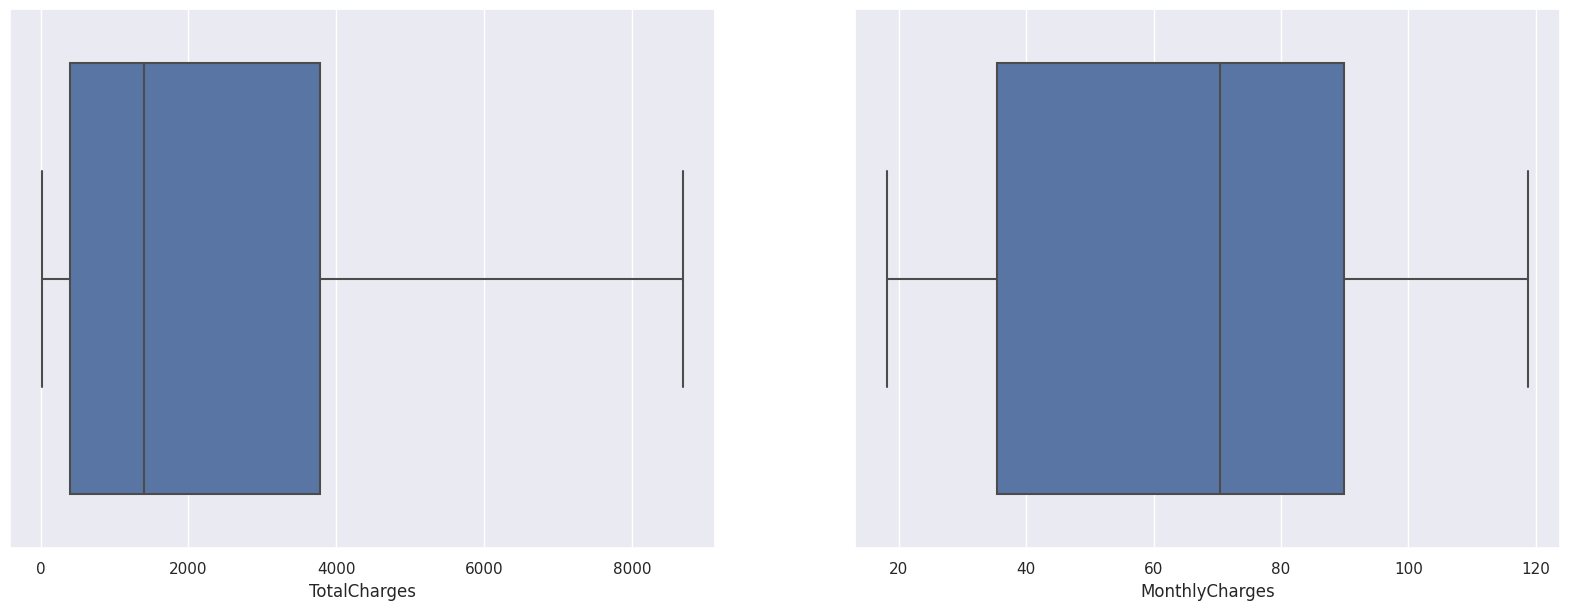

In [20]:
# Box plots for continious features 'TotalCharges' и 'MonthlyCharges'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))


sns.boxplot(x=df['TotalCharges'], ax=ax[0])
sns.boxplot(x=df['MonthlyCharges'], ax=ax[1])

We shall also check the target's distibution


In [21]:
print(df['Churn'].value_counts())
print(str(round(df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]*100, 2)) + '%%')

No     5174
Yes    1869
Name: Churn, dtype: int64
26.54%%


*We*'ve got imbalanced dataset.

Now, we need to observe correlation of our features

<ipython-input-22-e6633a40f71d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True)


<Axes: >

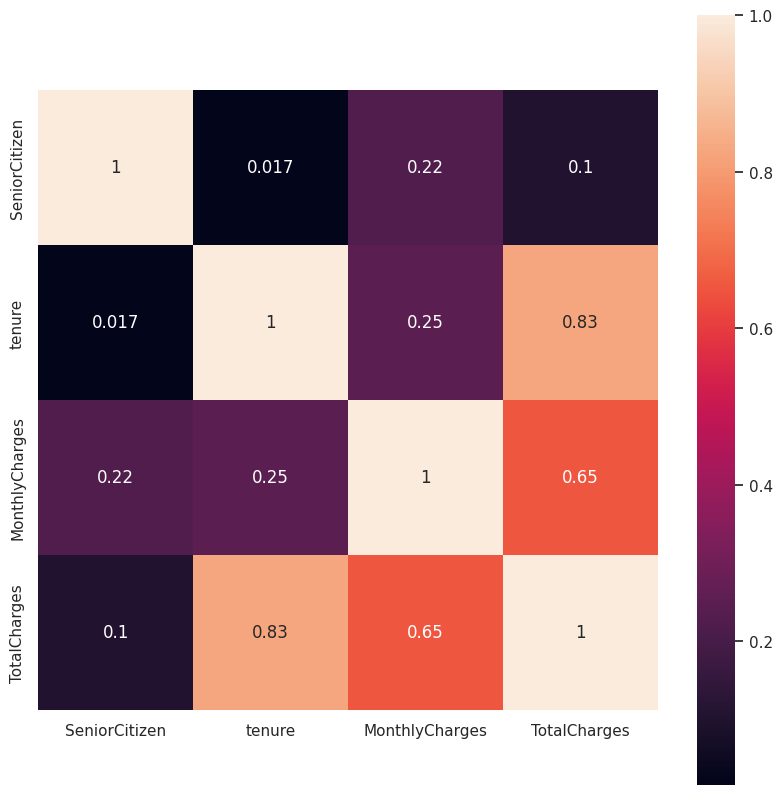

In [22]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True)

As we can see, feature "TotalCharges" higly correlates with "tenure" and "MonthlyCharges"

# Data preparation

Checking out unique values of categorical columns to figure out could we transorm them to binaries

In [24]:
def unique_values():
  cat_columns = np.unique(df.select_dtypes('object').columns)
  for i in cat_columns:
    print(i, df[i].unique())

unique_values()

Churn ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No' 'Yes' 'No internet service']
InternetService ['DSL' 'Fiber optic' 'No']
MultipleLines ['No phone service' 'No' 'Yes']
OnlineBackup ['Yes' 'No' 'No internet service']
OnlineSecurity ['No' 'Yes' 'No internet service']
PaperlessBilling ['Yes' 'No']
Partner ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService ['No' 'Yes']
StreamingMovies ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
gender ['Female' 'Male']


In [25]:
df[(df['PhoneService'] == 'No')&
   (df['InternetService'] != 'No')]['Churn'].value_counts()

No     512
Yes    170
Name: Churn, dtype: int64

In [26]:
round(170/512*100, 1)

33.2

In [27]:
df[df['InternetService'] == 'No']['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [28]:
round(113/1413*100, 1)

8.0

In [29]:
df[(df['PhoneService'] != 'No')&
   (df['InternetService'] != 'No')]['Churn'].value_counts()

No     3249
Yes    1586
Name: Churn, dtype: int64

In [30]:
round(1586/3249*100, 1)

48.8

In [31]:
1526+4835+682

7043

In [32]:
33.2+8.0+48.8

90.0

Features: 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport' have 3 unique values, where value "No internet service" can be converted to "No"

In [33]:
to_binary = ['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']

for i in to_binary:
  df.loc[df[i].isin(['No internet service']), i] = 'No'

In [34]:
unique_values()

Churn ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
MultipleLines ['No phone service' 'No' 'Yes']
OnlineBackup ['Yes' 'No']
OnlineSecurity ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Partner ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService ['No' 'Yes']
StreamingMovies ['No' 'Yes']
StreamingTV ['No' 'Yes']
TechSupport ['No' 'Yes']
gender ['Female' 'Male']


Plotting graphs to see the churn distribution for some of the features.

In [35]:
# converting target column to binary

df.loc[df['Churn'] == 'No','Churn'] = 0
df.loc[df['Churn'] == 'Yes','Churn'] = 1
df['Churn'] = df['Churn'].astype('int64')

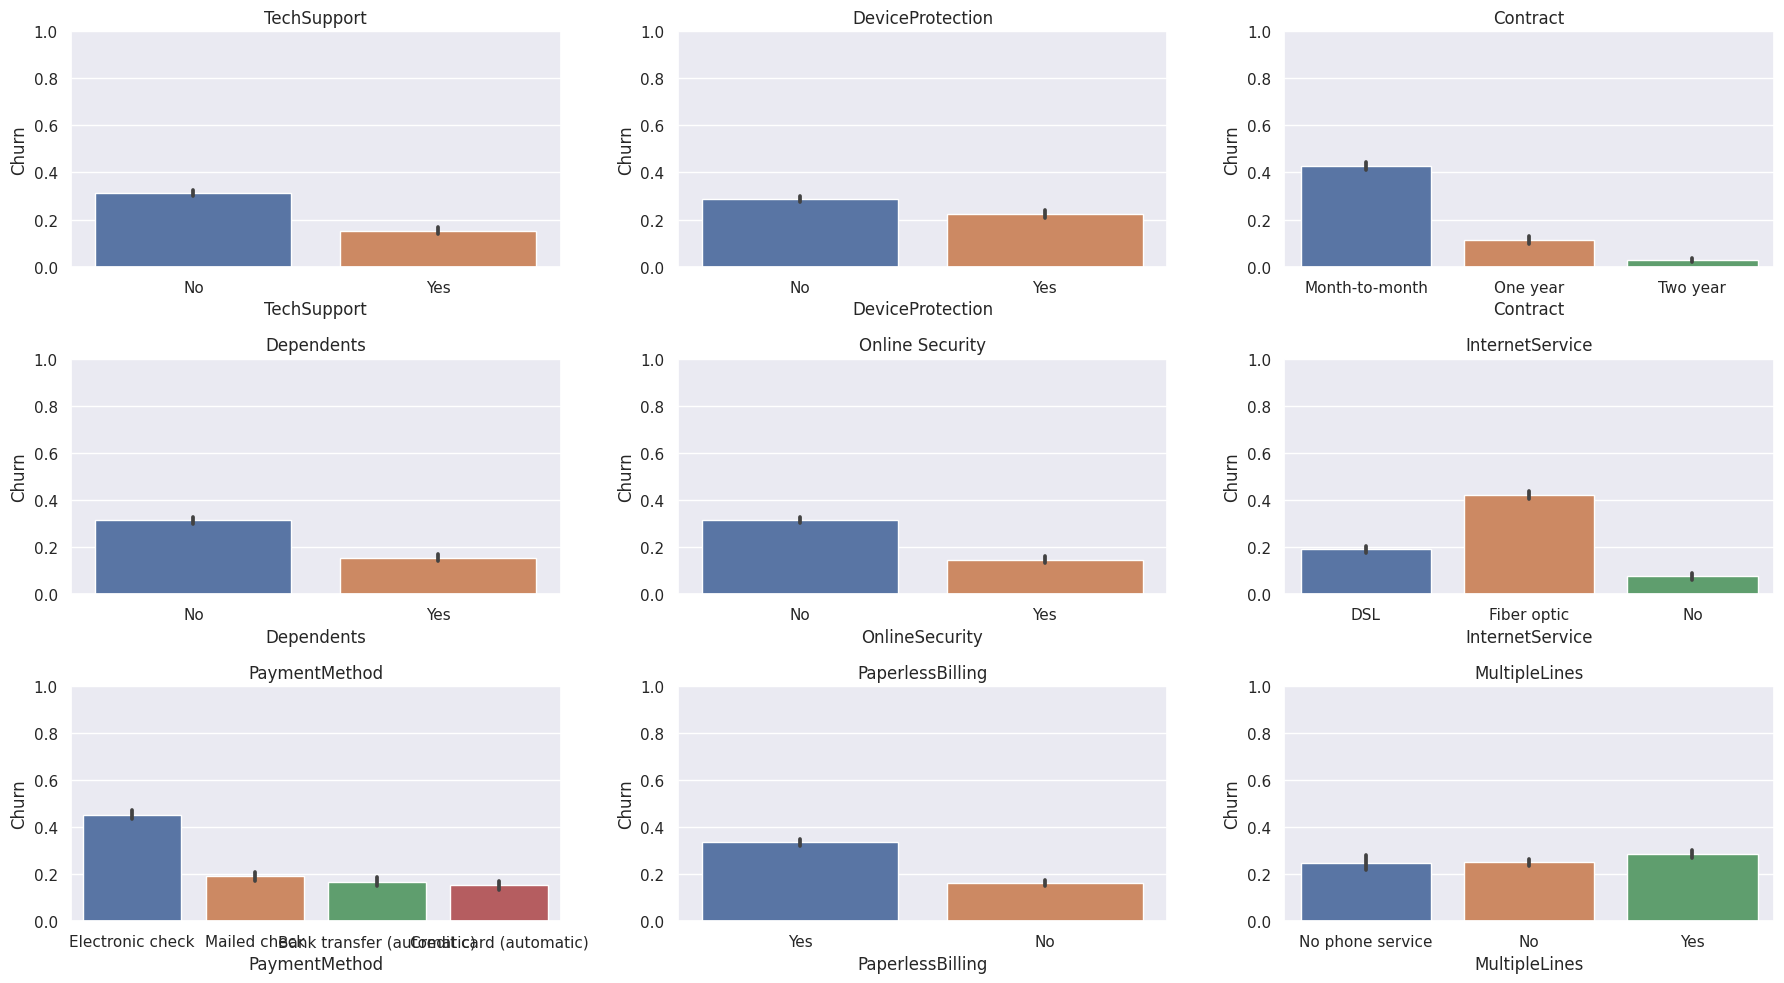

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,10))

sns.barplot(x=df['TechSupport'], y=df['Churn'], ax=ax[0][0])
ax[0][0].set_ylim(0,1)
ax[0][0].set_title('TechSupport')

sns.barplot(x=df['DeviceProtection'], y=df['Churn'], ax=ax[0][1])
ax[0][1].set_ylim(0,1)
ax[0][1].set_title('DeviceProtection')

sns.barplot(x=df['Contract'], y=df['Churn'], ax=ax[0][2])
ax[0][2].set_ylim(0,1)
ax[0][2].set_title('Contract')

sns.barplot(x=df['Dependents'], y=df['Churn'], ax=ax[1][0])
ax[1][0].set_ylim(0,1)
ax[1][0].set_title('Dependents')

sns.barplot(x=df['OnlineSecurity'], y=df['Churn'], ax=ax[1][1])
ax[1][1].set_ylim(0,1)
ax[1][1].set_title('Online Security')

sns.barplot(x=df['InternetService'], y=df['Churn'], ax=ax[1][2])
ax[1][2].set_ylim(0,1)
ax[1][2].set_title('InternetService')

sns.barplot(x=df['PaymentMethod'], y=df['Churn'], ax=ax[2][0])
ax[2][0].set_ylim(0,1)
ax[2][0].set_title('PaymentMethod')

sns.barplot(x=df['PaperlessBilling'], y=df['Churn'], ax=ax[2][1])
ax[2][1].set_ylim(0,1)
ax[2][1].set_title('PaperlessBilling')

sns.barplot(x=df['MultipleLines'], y=df['Churn'], ax=ax[2][2])
ax[2][2].set_ylim(0,1)
ax[2][2].set_title('MultipleLines')


plt.tight_layout()

We shall encode out categorical variables to numerical because it's nessesary for some of the machine learning algorithms that're going to be used:

- LabelEncoder for binaries
- pd.get_dummies for categorical

In [37]:
# binary features, except 'Churn'
bin_var = [col for col in df.columns if len(df[col].unique()) == 2 and col != 'Churn']

# categorical features
cat_var = [col for col in df.select_dtypes(['object']).columns.tolist() if col not in bin_var]

# LabelEncoder for binaries
le = LabelEncoder()
for col in bin_var:
  df[col] = le.fit_transform(df[col])

# get_dummies for categorical
df = pd.get_dummies(df, columns=cat_var)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [38]:
df.shape

(7043, 29)

# Machine learning models

Splitting dataset to train and test

In [39]:
# features
X = df.drop('Churn', axis=1)
# target
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

So, using an imbalanced dataset can bring us some trouble as soon as classificator is likely to wrongly classify minority class' objects. That's why we'll use a strategy to struggle with it. It's called undersampling. The key concept of it is to equalize the major class objects and the minor ones by delition. It's not the best strategy to struggle an imbalanced dataset but the simplest one.

## Meitrcs

For evaluatin model's perfomance metrics "Precision", "Recall" and "Accuracy" are used. "Precision" will give us a percentage of positively classified objects to truly positive objects, "Recall" will show the proportion of real positives that were correctly identified.

According to a task (to identify a churned client), more reasonable should be to choose a Recall metric i.e lower the number of False Negatives.


In [41]:
# Undersampling
rus = RandomUnderSampler()


In [42]:
# Feature normalization for nn
from sklearn.preprocessing import  MinMaxScaler

mx = MinMaxScaler().fit(X_train)

X_train_norm = mx.transform(X_train)
X_test_norm = mx.transform(X_test)

X_train_rus, y_train_rus = rus.fit_resample(X_train_norm, y_train)

## Neural Network

Creating neural network. Tuning hyperparameters:

*   number of hidden layers
*   number of neurons in layers
*   activation functions
*   dropout rate
*   optimizer




In [43]:
def model(neurons0=32,
          neurons1=64,
          optimizer='adam',
          drop_rate0=0.3,
#           activation0=activation,
#           activation1=activation,
          # num_layers=num_layers
         ):
  model = keras.Sequential()
  model.add(layers.Dense(neurons0, input_shape=(X_train.shape[1],), activation='softmax'))
  model.add(layers.Dropout(drop_rate0))
  # for i in layers_num:
  model.add(layers.Dense(neurons1, activation='selu'))
  # output layer - sigmoid
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      # metrics recall
      metrics=[tf.keras.metrics.Recall()]
  )
  return model

To use Scikit-Learn API with tensorflow model we have to use Wraper method KerasClassifier

In [44]:
nn = KerasClassifier(build_fn=model, batch_size=100, epochs=100)

In [45]:
layers_num = [1, 2, 3, 4]                       # number of hidden layers
neurons = [16, 32, 64, 128]
activation = ['softmax', 'tanh', 'selu', 'elu']
optimizer = ['adadelta', 'adam']
drop_rate = [0, 0.1, 0.2, 0.3, 0.4]
batch_size = [5, 8, 10, 20]
epochs = [25, 50, 75, 100]

param_grid = dict(activation0=activation, activation1=activation)

In [92]:
# GridSearchCV
grid = GridSearchCV(estimator=nn, param_grid=param_grid, n_jobs=-1, cv=3, scoring='recall')
grid_result = grid.fit(X_train_rus, y_train_rus)


# tuning results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [47]:
nn = model()

history = nn.fit(X_train_rus, y_train_rus,
                 validation_data=(X_test_norm, y_test),
                 batch_size=100, epochs=200)

Epoch 1/200
28/28 [==============================] - 2s 15ms/step - loss: 0.6834 - recall: 0.3958 - val_loss: 0.6912 - val_recall: 0.9455
Epoch 2/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6592 - recall: 0.7033 - val_loss: 0.6444 - val_recall: 0.7841
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6171 - recall: 0.7888 - val_loss: 0.5723 - val_recall: 0.7421
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5736 - recall: 0.7284 - val_loss: 0.5741 - val_recall: 0.8218
Epoch 5/200
28/28 [==============================] - 0s 5ms/step - loss: 0.5425 - recall: 0.7802 - val_loss: 0.5174 - val_recall: 0.7715
Epoch 6/200
28/28 [==============================] - 0s 5ms/step - loss: 0.5282 - recall: 0.7845 - val_loss: 0.5090 - val_recall: 0.7652
Epoch 7/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5228 - recall: 0.7737 - val_loss: 0.5099 - val_recall: 0.7799
Epoch 8/200
28/28 [=====================

In [48]:
a = [i for i in history.history.keys()]

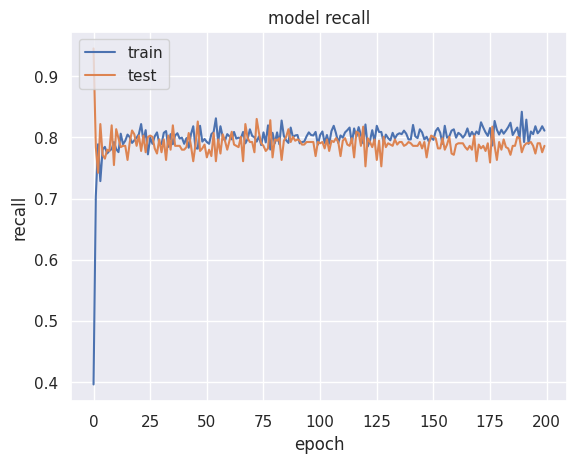

In [49]:
plt.plot(history.history[a[1]])
plt.plot(history.history[a[3]])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 ## Creating models:

- Random Forest
- Logistic Regression
- Decision Tree


In [50]:
# As decision tree and randomforest are scale invariant, we standartize
# out features because of Logistic Regression
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_std = (X_test - np.mean(X_test)) / np.std(X_test)
X_train_rus, y_train_rus = rus.fit_resample(X_train_std, y_train)

lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()


model = []
cross_val = []
recall = []
for i in (rf, dt, lr):
  # if i == lr:
    # Feature standartization for Logistic Regression
    # X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)

    # X_train_rus, y_train_rus = rus.fit_resample(X_train_std, y_train)
  model.append(i.__class__.__name__)
  # baseline scores of models
  cross_val.append(cross_validate(i, X_train_rus, y_train_rus, scoring='recall'))

for d in range(len(cross_val)):
  recall.append(cross_val[d]['test_score'].mean())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [51]:
model_recall = pd.DataFrame
pd.DataFrame(data=recall, index=model, columns=['recall'])

,recall
RandomForestClassifier,0.762211
DecisionTreeClassifier,0.682437
LogisticRegression,0.801019


In [ ]:
# min_max scaler  std       std on new rus
# rf  0.745       0.753     0.7622
# dt  0.649       0.679     0.6824
# lr  0.794       0.788     0.8010

Now whe shall tune each model's hyperparameters using GridSearchCV and RandomizedSearchCV.

## Logistic Regression


We need to drop highly correlated features in order to fit our data to Logistic Regression because multicollinearity will lead us to absurd coeficients of our model




In [69]:
lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV
grid_search = GridSearchCV(lr, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus.drop('TotalCharges', axis=1), y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8707021479590521 for {'C': 0.0001, 'solver': 'liblinear'}


Observing increase of a recall with 7% after tuning

## Decision tree

First of all, using RandomizedSearchCV to narrow hyperparameters search space





In [53]:
dt = DecisionTreeClassifier()
modle = dt.fit(X=X_train_rus, y=y_train_rus)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Descisicon tree tuning

param_dist = {"max_depth": [3, 4, 5, 6, 7, None],
              "max_features":  [np.random.randint(1, X_train.shape[1]) for i in range(5)],
              "min_samples_leaf":  [i for i in range(1, 10)],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2,4,6,8],
              "splitter": ['best', 'random'],
              }

dt = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, cv=5, scoring='recall')

# Fit it to the data
tree_cv.fit(X_train_rus, y_train_rus)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 5, 'max_depth': 5, 'criterion': 'gini'}





We shall use new hyperparameters space (i.e. we got from RandomizedSearchCV) to better our model performance now

In [56]:
param_dist = {"max_depth": [2, 3, 4, None],
              "max_features":  [i for i in range(8, 16)],
              "min_samples_leaf":  [i for i in range(6,12)],
              # "criterion": ["gini", "entropy"],
              "min_samples_split": [2,3]
              # "splitter": ['best', 'random'],
              }
dt = DecisionTreeClassifier(splitter='random', criterion='entropy')

# dt = DecisionTreeClassifier(splitter='best', criterion='gini')

tree_grid_cv = GridSearchCV(estimator=dt, param_grid=param_dist, cv=5, scoring='recall')

tree_grid_cv.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              splitter='random'),
             param_grid={'max_depth': [2, 3, 4, None],
                         'max_features': [8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_leaf': [6, 7, 8, 9, 10, 11],
                         'min_samples_split': [2, 3]},
             scoring='recall')

In [57]:
print("Tuned Decision Tree Parameters: {}".format(tree_grid_cv.best_params_))
print("Best score is {}".format(tree_grid_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 2, 'max_features': 13, 'min_samples_leaf': 7, 'min_samples_split': 3}
Best score is 0.9037698873159536


Tuned Decision Tree Parameters: {'max_depth': 2, 'max_features': 25, 'min_samples_leaf': 6, 'min_samples_split': 4}

dt = DecisionTreeClassifier(splitter='best', criterion='gini', max_depth=2, max_features=25, min_samples_leaf=6, min_samples_split=4)


{'max_depth': 2, 'max_features': 12, 'min_samples_leaf': 10, 'min_samples_split': 2}

dt = DecisionTreeClassifier(splitter='random', criterion='entropy', max_depth=2, max_features=12,min_samples_leaf=10, min_samples_split=2)

Threre's an improvment for 25% after tuning

## Random Forest

Making same thing for RandomForest

In [95]:
from pprint import pprint

# hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [96]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='recall',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [98]:
rf_random.fit(X_train_rus, y_train_rus)


In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1800}


In [ ]:
rf_random.best_score_

GridSearchCV

In [73]:
# refreshing hyperparameters' values
n_estimators = [900, 1000]
max_depth = [2, 3]
min_samples_split = [5, 6]
min_samples_leaf = [2, 3]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 3],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [5, 6],
 'n_estimators': [900, 1000]}


In [93]:
rf = RandomForestClassifier(max_features='auto', bootstrap=True)

rf_grid = GridSearchCV(estimator=rf, param_grid=random_grid,
                              scoring='recall',
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)

rf_grid.fit(X_train_rus, y_train_rus)


In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

##Final report

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.88      0.66      0.75      1284
           1       0.45      0.76      0.57       477

    accuracy                           0.68      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.76      0.68      0.70      1761



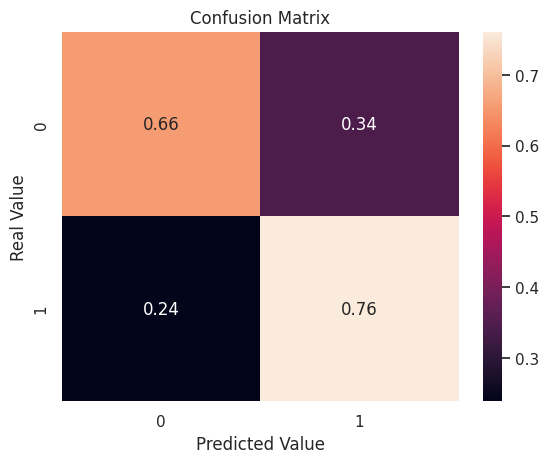

In [94]:
# final RandomForest model

rf = RandomForestClassifier(max_features='auto', bootstrap=True,
                            max_depth=2, min_samples_leaf=3,
                            min_samples_split=5, n_estimators=900)

rf.fit(X_train_rus, y_train_rus)

# prediction
y_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1284
           1       0.44      0.90      0.59       477

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761



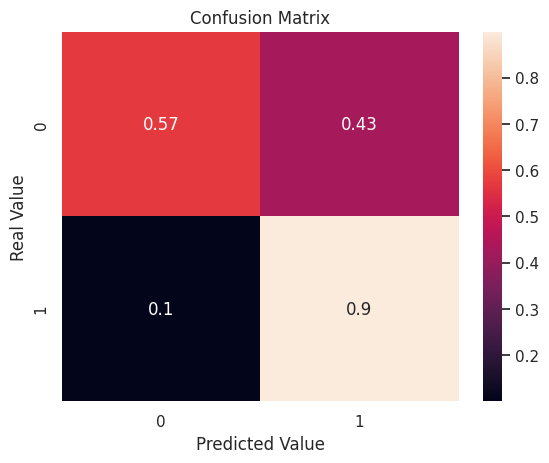

In [76]:
# final decision tree model

dt = DecisionTreeClassifier(splitter='random', criterion='entropy',
                            max_depth=2, max_features=12,
                            min_samples_leaf=10, min_samples_split=2)

dt.fit(X_train_rus, y_train_rus)

# prediction
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1284
           1       0.47      0.88      0.61       477

    accuracy                           0.69      1761
   macro avg       0.70      0.75      0.68      1761
weighted avg       0.81      0.69      0.71      1761



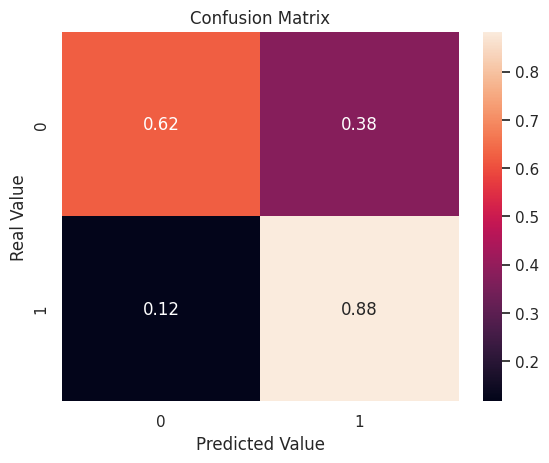

In [78]:
# final Logistic Regression model
lr = LogisticRegression(C=0.0001, solver='liblinear')
lr.fit(X_train_rus.drop('TotalCharges', axis=1), y_train_rus)

# prediction
y_pred = lr.predict(X_test_std.drop('TotalCharges', axis=1))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

In [83]:
print('Intercept')

pd.DataFrame(zip(X_train_rus.drop('TotalCharges', axis=1).columns,
                 np.transpose(lr.coef_)),
             columns=['features', 'coef'])

Intercept


,features,coef
0,gender,[0.0010896573476125342]
1,SeniorCitizen,[0.01818999604451091]
2,Partner,[-0.021432406565800213]
3,Dependents,[-0.019987607199019628]
4,tenure,[-0.0466132987252529]
5,PhoneService,[0.0009939407446698145]
6,OnlineSecurity,[-0.021179429774643408]
7,OnlineBackup,[-0.008757662624422052]
8,DeviceProtection,[-0.009628725053797754]
9,TechSupport,[-0.019443542782413267]


In [91]:
X_test_norm = mx.transform(X_test)

# predicting probabilities for test set
yhat_probs = nn.predict(X_test_norm, verbose=0)
# predicting crisp classes for test set
yhat_classes = (nn.predict(X_test_norm) > 0.5).astype("int64")
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 : %f' % f1)

# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

56/56 [==============================] - 0s 2ms/step
Accuracy: 0.738785
Precision: 0.511596
Recall: 0.786164
F1 : 0.619835
[[926 358]
 [102 375]]


# Results



*   Random Forest - 0.76
*   Decision Tree - 0.90
*   Logistic Regression - 0.88
*   Neural network - 0.78



# Conclusion

The goal of this project was to develop a model that would be able to determine churning clients from a telecom company, as efficiently as possible.

It's well heard that to keep a client is about 5-7 times cheaper than to find a new one. That's why it's important for a company to identify churners aforehand to have some time to develop strategies (like offering discounts, special servicies, etc.) to reduce the churn rate.

Were created, tunned and analyzed work of 4 different models to find out the  one that performs the best.

The Decision Tree model has the best recall from all the models, but Logistic Regression model has better f1 score with slightly lower recall score.
So, to my mind, it outperformes other models.